## Experiment 5 - House Prices Regression
## Nikita Chitre 
## Roll no - 4
## Batch A


Objectives: Based on competition available at Kaggle, https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/description, revolving around predicting the house price through regression techniques. your objective is to build a regression model and measure the performance of the model in terms of accuracy, recall, sensitivity, specificity, ROC curves, precision recall curves and loss function for regression

Link: https://www.kaggle.com/nikitachitre/competitions

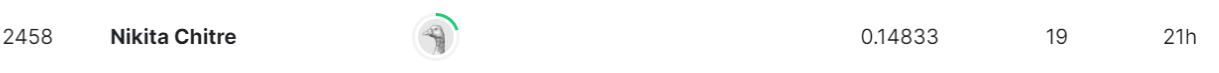

* In this notebook we are going to predict house prices using Linear Regression with the data available in kaggle.
* First, we will train a baseline model without preprocessing the data. 
* Then, we will preprocess the features and train the model and compare it's performance with baseline model.

### Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_train.shape

(1460, 81)

There are 1460 rows and 81 columns in the dataset

### Checking Missing Values in Train Df

In [ ]:
length = len(df_train)
for col in df_train.columns:
    print(f'{col}: {((df_train[col].isna().sum()/length)*100).round(2)} %')

Id: 0.0 %
MSSubClass: 0.0 %
MSZoning: 0.0 %
LotFrontage: 17.74 %
LotArea: 0.0 %
Street: 0.0 %
Alley: 93.77 %
LotShape: 0.0 %
LandContour: 0.0 %
Utilities: 0.0 %
LotConfig: 0.0 %
LandSlope: 0.0 %
Neighborhood: 0.0 %
Condition1: 0.0 %
Condition2: 0.0 %
BldgType: 0.0 %
HouseStyle: 0.0 %
OverallQual: 0.0 %
OverallCond: 0.0 %
YearBuilt: 0.0 %
YearRemodAdd: 0.0 %
RoofStyle: 0.0 %
RoofMatl: 0.0 %
Exterior1st: 0.0 %
Exterior2nd: 0.0 %
MasVnrType: 0.55 %
MasVnrArea: 0.55 %
ExterQual: 0.0 %
ExterCond: 0.0 %
Foundation: 0.0 %
BsmtQual: 2.53 %
BsmtCond: 2.53 %
BsmtExposure: 2.6 %
BsmtFinType1: 2.53 %
BsmtFinSF1: 0.0 %
BsmtFinType2: 2.6 %
BsmtFinSF2: 0.0 %
BsmtUnfSF: 0.0 %
TotalBsmtSF: 0.0 %
Heating: 0.0 %
HeatingQC: 0.0 %
CentralAir: 0.0 %
Electrical: 0.07 %
1stFlrSF: 0.0 %
2ndFlrSF: 0.0 %
LowQualFinSF: 0.0 %
GrLivArea: 0.0 %
BsmtFullBath: 0.0 %
BsmtHalfBath: 0.0 %
FullBath: 0.0 %
HalfBath: 0.0 %
BedroomAbvGr: 0.0 %
KitchenAbvGr: 0.0 %
KitchenQual: 0.0 %
TotRmsAbvGrd: 0.0 %
Functional: 0.0 %
Firep

* We will drop all the columns having missing values. 
* We will not fill the missing values since we only want a baseline model in the first stage.

### Dropping Columns with Missing values

In [ ]:
df_train_clean = df_train.dropna(axis= 1)

In [ ]:
df_train_clean.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
df_train_clean.shape

(1460, 62)

The new dataframe has 62 columns. 

### Baseline Model 

In [ ]:
df_train_clean.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


#### Label Encoding

Since we have categorical features in the dataset, we need to Label Encode them so that they can be used in the model

In [1]:
cat_col = [col for col in df_train_clean.columns if df_train_clean[col].dtypes=='object']
for col in cat_col:

    df_train_clean[col] = df_train_clean[col].astype('category').cat.codes

In [ ]:
df_train_clean.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


Now all categorical features have been label encoded. 

#### Model Training

##### Linear Regression Model

In [ ]:
# performing train test split
y = df_train_clean["SalePrice"] 
X = df_train_clean.drop(["SalePrice"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 40)

In [ ]:
linearRegr = LinearRegression()   

In [ ]:
linearRegr.fit(X_train, y_train)     

LinearRegression()

#### Model Testing

In [ ]:
acc = linearRegr.score( X_test, y_test)
print(f'Accuracy Score: {acc * 100}')

Accuracy Score: 85.05003901515134


In [ ]:
y_pred = linearRegr.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 771813144.6090761


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 27781.52523906987


We can see that our Baseline Model gave an accuracy of 85%.

Let's see how we can improve the model after Processing the data. 

## Task 2

### Feature Processing 




#### Percentage of Missing Values

In [ ]:
length = len(df_train)
for col in df_train.columns:

    num = df_train[col].isna().sum()/length
    if num != 0: 
        print(f'{col}: {((df_train[col].isna().sum()/length)*100).round(2)} %')

LotFrontage: 17.74 %
Alley: 93.77 %
MasVnrType: 0.55 %
MasVnrArea: 0.55 %
BsmtQual: 2.53 %
BsmtCond: 2.53 %
BsmtExposure: 2.6 %
BsmtFinType1: 2.53 %
BsmtFinType2: 2.6 %
Electrical: 0.07 %
FireplaceQu: 47.26 %
GarageType: 5.55 %
GarageYrBlt: 5.55 %
GarageFinish: 5.55 %
GarageQual: 5.55 %
GarageCond: 5.55 %
PoolQC: 99.52 %
Fence: 80.75 %
MiscFeature: 96.3 %


Creating copy of the dataframe so that we can preprocess the copy instead

In [ ]:
df_train_clean = df_train.copy()

In [ ]:
df_train_clean.loc[:, "LotFrontage"] = df_train_clean.loc[:, "LotFrontage"].fillna(0)

#### Removing columns having more than 50% null values

In [ ]:
df_train_clean.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id'], axis=1, inplace=True)

In [ ]:
df_train_clean.shape

(1460, 76)

#### Filling Missing Values of FireplaceQu column 

As per the data description, NA value in FireplaceQu corresponds to No Fireplace. 

In [ ]:
df_train_clean['FireplaceQu'] = df_train_clean['FireplaceQu'].fillna('None')

In [ ]:
length = len(df_train_clean)
for col in df_train_clean.columns:

    num = df_train_clean[col].isna().sum()/length
    if num != 0: 
        print(f'{col}: {((df_train_clean[col].isna().sum()/length)*100).round(2)} %')

MasVnrType: 0.55 %
MasVnrArea: 0.55 %
BsmtQual: 2.53 %
BsmtCond: 2.53 %
BsmtExposure: 2.6 %
BsmtFinType1: 2.53 %
BsmtFinType2: 2.6 %
Electrical: 0.07 %
GarageType: 5.55 %
GarageYrBlt: 5.55 %
GarageFinish: 5.55 %
GarageQual: 5.55 %
GarageCond: 5.55 %


Thus, we have handled missing values of FireplaceQu column.

Next, we will fill categorical columns by Mode and Numeric columns by Mean.

#### Filling Categorical columns by Mode

In [ ]:
cat_col = [col for col in df_train_clean.columns if df_train_clean[col].dtypes=='object']

for col in cat_col:
    mode = df_train_clean[col].mode()[0]
    df_train_clean[col] = df_train_clean[col].fillna(mode) 

In [ ]:
length = len(df_train_clean)
for col in df_train_clean.columns:

    num = df_train_clean[col].isna().sum()/length
    if num != 0: 
        print(f'{col}: {((df_train_clean[col].isna().sum()/length)*100).round(2)} %')

MasVnrArea: 0.55 %
GarageYrBlt: 5.55 %


Thus, all categorical columns have been handled.

Now let's handle numeric columns

#### Filling Numeric Columns by Mean

In [ ]:
num_col = [col for col in df_train_clean.columns if df_train_clean[col].dtypes !='object']

for col in num_col:
    mean = df_train_clean[col].mean()
    df_train_clean[col] = df_train_clean[col].fillna(mean) 

cat_col = [col for col in df_train_clean.columns if df_train_clean[col].dtypes=='object']
for col in cat_col:
    df_train_clean[col] = df_train_clean[col].astype('category').cat.codes

In [ ]:
df_train_clean.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

Hence all Missing Values have been Handled

### Data Visualization

#### Correlation of Numerical Features

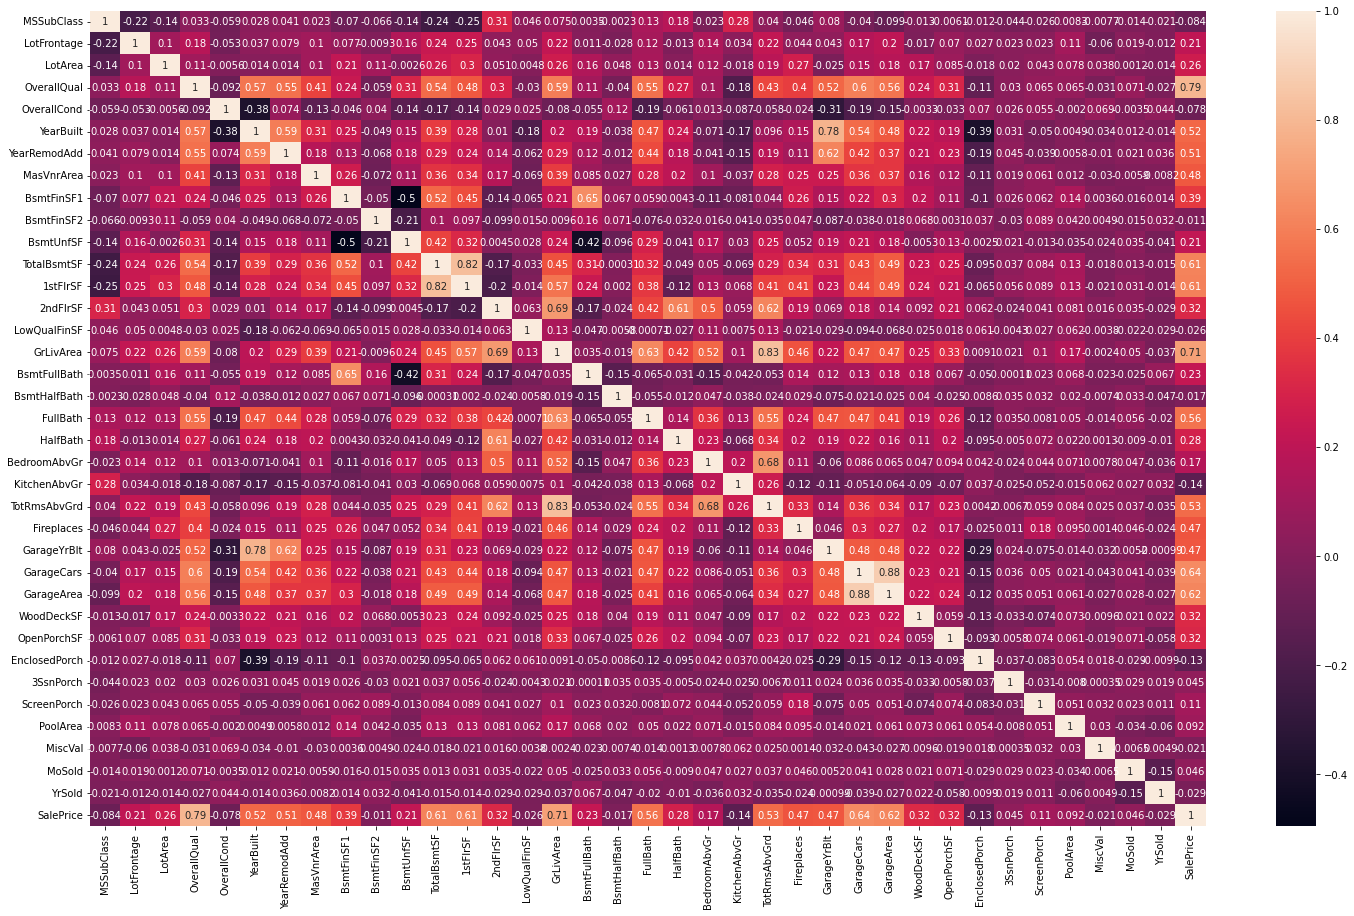

In [ ]:
_ = plt.figure(figsize=(25,15))
sns.heatmap(data=df_train_clean[num_col].corr(), annot=True)

We can see that feature OverallQual, GrLivArea, TotalBsmtSF, 1stFlrSF are highly correlated with SalePrice

#### Relationship between SalePrice and OverallQual

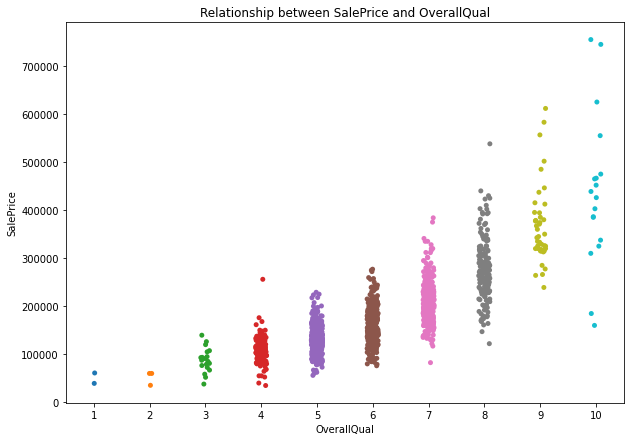

In [ ]:
_ = plt.figure(figsize=(10,7))
plt.title('Relationship between SalePrice and OverallQual')
_ = sns.stripplot(data=df_train_clean, y='SalePrice', x='OverallQual')

*   As the Overall Quality of house increases, the Sales Price increases.
*   This is as per our expectation.



#### Relationship between SalePrice and GrLivArea

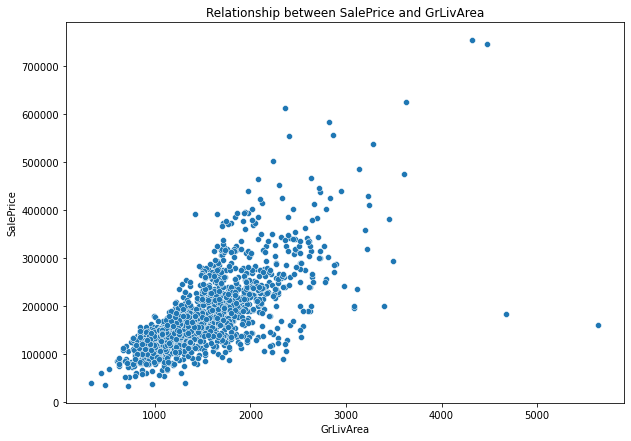

In [ ]:
_ = plt.figure(figsize=(10,7))
plt.title('Relationship between SalePrice and GrLivArea')
_ = sns.scatterplot(data=df_train_clean, y='SalePrice', x='GrLivArea')

 



*   We can see that SalePrice and GrLivArea are quiet related to each other.
*   However, there are some outliers in the data.



#### Relationship between SalePrice and TotalBsmtSF

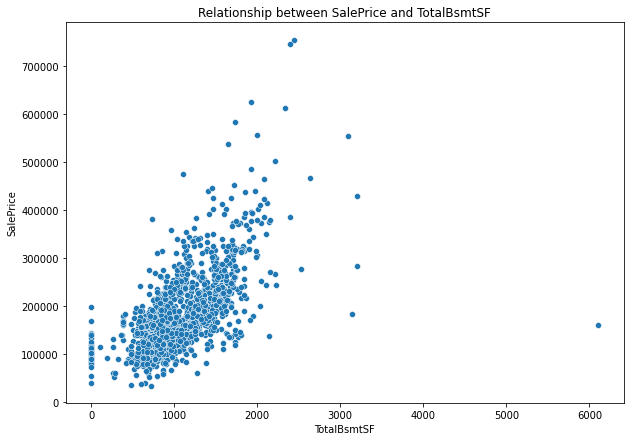

In [ ]:
_ = plt.figure(figsize=(10,7))
plt.title('Relationship between SalePrice and TotalBsmtSF')
_ = sns.scatterplot(data=df_train_clean, y='SalePrice', x='TotalBsmtSF')

  



*   We can see that SalePrice and TotalBsmtSF are quiet related to each other.
*   However, there are some outliers in the data.
* Also, some of the data points have "zero" value indicating there is no Basement.



#### Relationship between SalePrice and 1stFlrSF

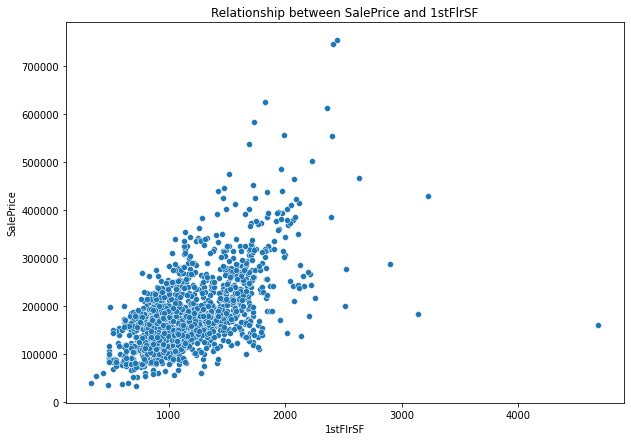

In [ ]:
_ = plt.figure(figsize=(10,7))
plt.title('Relationship between SalePrice and 1stFlrSF')
_ = sns.scatterplot(data=df_train_clean, y='SalePrice', x='1stFlrSF')

* We can see that SalePrice and 1stFlrSF are quiet related to each other. 
* However, there are some outliers in the data. 

#### Relationship between SalePrice, GarageArea and GarageCars

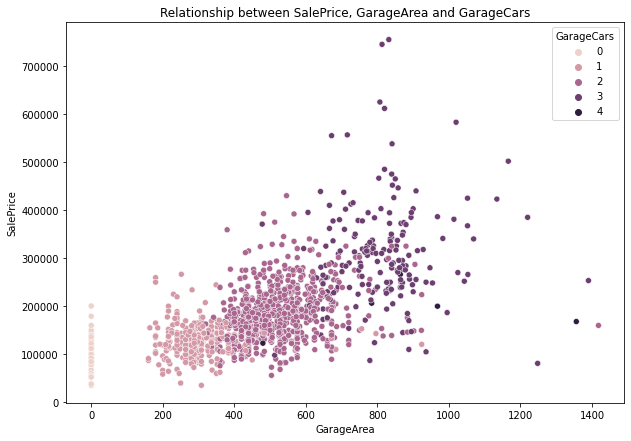

In [ ]:
_ = plt.figure(figsize=(10,7))
plt.title('Relationship between SalePrice, GarageArea and GarageCars')
_ = sns.scatterplot(data=df_train_clean, y='SalePrice', x='GarageArea', hue='GarageCars')

* We can see that SalePrice increases as GarageArea increases. 
* Also GarageArea increases with no. of cars. 
* Also, there are few houses having no garage area and hence no cars

#### Relationship between SalePrice, GrLivArea and TotRmsAbvGrd

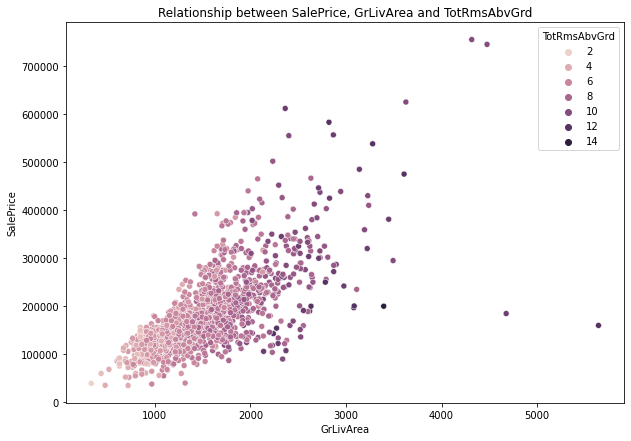

In [ ]:
_ = plt.figure(figsize=(10,7))
plt.title('Relationship between SalePrice, GrLivArea and TotRmsAbvGrd')
_ = sns.scatterplot(data=df_train_clean, y='SalePrice', x='GrLivArea', hue='TotRmsAbvGrd')

* We can see that SalePrice increases as GrLivArea increases. 
* Also GrLivArea increases with no. of rooms.

### Handling Outlier 

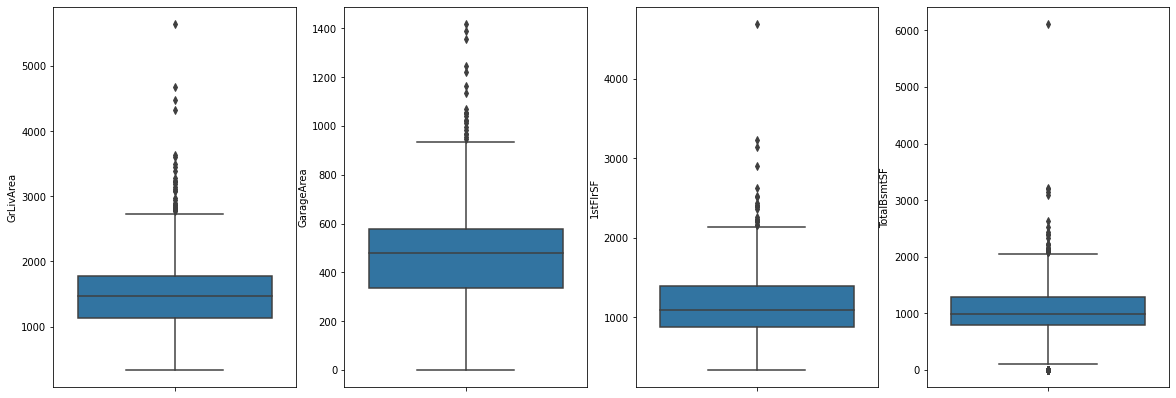

In [ ]:
f, axes = plt.subplots(1, 4, figsize=(20,7))
sns.boxplot(data=df_train_clean, y='GrLivArea', ax=axes[0])
sns.boxplot(data=df_train_clean, y='GarageArea', ax=axes[1])
sns.boxplot(data=df_train_clean, y='1stFlrSF', ax=axes[2])
sns.boxplot(data=df_train_clean, y='TotalBsmtSF', ax=axes[3])

We can see that there are outliers in the data. So we will replace them with upper and lower limit

In [ ]:
for variable in num_col: 
    Q1 = df_train_clean[variable].quantile(0.25)
    Q3 = df_train_clean[variable].quantile(0.75)
    IQR = Q3 - Q1
    up_limit = Q3+1.5*IQR
    low_limit = Q1-1.5*IQR

    df_train_clean.loc[(df_train_clean[variable] < low_limit), variable] = low_limit
    df_train_clean.loc[(df_train_clean[variable] > up_limit), variable] = up_limit

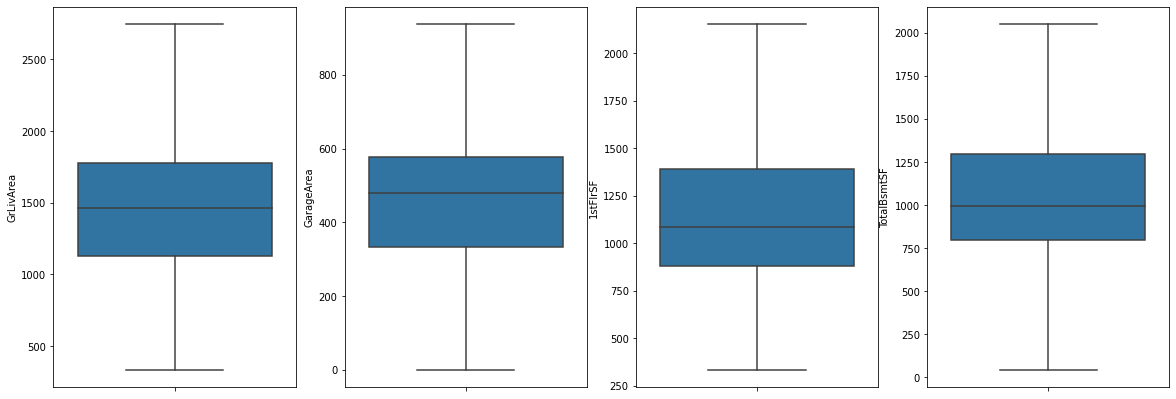

In [ ]:
f, axes = plt.subplots(1, 4, figsize=(20,7))
sns.boxplot(data=df_train_clean, y='GrLivArea', ax=axes[0])
sns.boxplot(data=df_train_clean, y='GarageArea', ax=axes[1])
sns.boxplot(data=df_train_clean, y='1stFlrSF', ax=axes[2])
sns.boxplot(data=df_train_clean, y='TotalBsmtSF', ax=axes[3])

Hence All outliers have been removed

### Feature Engineering - Adding New Features

* We will create Polynomial features by raising existing features (having high correlation with Price) to an exponent.
* We do this because: a squared or cubed version of an input variable will change the probability distribution, separating the small and large values, a separation that is increased with the size of the exponent.
* This separation can help some machine learning algorithms make better predictions and is common for regression predictive modeling tasks and generally tasks that have numerical input variables.

In [ ]:
df_train_clean["OverallQual-s2"] = df_train_clean["OverallQual"] ** 2
df_train_clean["OverallQual-s3"] = df_train_clean["OverallQual"] ** 3
df_train_clean["OverallQual-Sq"] = np.sqrt(df_train_clean["OverallQual"])
df_train_clean["GarageArea-s2"] = df_train_clean["GarageArea"] ** 2
df_train_clean["GarageArea-s3"] = df_train_clean["GarageArea"] ** 3
df_train_clean["GarageArea-Sq"] = np.sqrt(df_train_clean["GarageArea"])
df_train_clean["GarageCars-s2"] = df_train_clean["GarageCars"] ** 2
df_train_clean["GarageCars-s3"] = df_train_clean["GarageCars"] ** 3
df_train_clean["GarageCars-Sq"] = np.sqrt(df_train_clean["GarageCars"])
df_train_clean["ExterQual-s2"] = df_train_clean["ExterQual"] ** 2
df_train_clean["ExterQual-s3"] = df_train_clean["ExterQual"] ** 3
df_train_clean["ExterQual-Sq"] = np.sqrt(df_train_clean["ExterQual"])
df_train_clean["KitchenQual-2"] = df_train_clean["KitchenQual"] ** 2
df_train_clean["KitchenQual-3"] = df_train_clean["KitchenQual"] ** 3
df_train_clean["KitchenQual-Sq"] = np.sqrt(df_train_clean["KitchenQual"])
df_train_clean["MasVnrArea-2"] = df_train_clean["MasVnrArea"] ** 2
df_train_clean["MasVnrArea-3"] = df_train_clean["MasVnrArea"] ** 3
df_train_clean["MasVnrArea-Sq"] = np.sqrt(df_train_clean["MasVnrArea"])

Now that we have performed feature engineering, we can train our model.

### Model Training

In [ ]:
y = df_train_clean["SalePrice"] 
X = df_train_clean.drop(["SalePrice"], axis=1)

#### Train Test Split

In [ ]:
y = df_train_clean["SalePrice"] 
X = df_train_clean.drop(["SalePrice"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 770)

In [ ]:
linearRegr = LinearRegression()   

In [ ]:
linearRegr.fit(X_train, y_train)     

LinearRegression()

#### Model Testing

In [ ]:
acc = linearRegr.score( X_test, y_test)
print(f'Accuracy Score: {acc * 100}')

Accuracy Score: 94.97398416564778


In [ ]:
y_pred = linearRegr.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 249799128.8396809


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Squared Error: {rmse}')

Mean Squared Error: 15805.034920546075


After Feature Processing, the Accuracy improved to 94.97%

Now, we will perform predictions on the test dataset given in the competition.

Note that we will perform same set of data preprocessing that we performed on original dataset.

### Checking Missing values in Test DF

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Creating copy of the dataframe so that we can preprocess the copy instead

In [ ]:
df_test_clean = df_test.copy()

In [ ]:
df_test_clean.loc[:, "LotFrontage"] = df_test_clean.loc[:, "LotFrontage"].fillna(0)

#### Removing columns having for than 50% null values

In [ ]:
df_test_clean.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id'], axis=1, inplace=True)

In [ ]:
df_test_clean.shape

(1459, 75)

#### Filling Missing Values of FireplaceQu column 

As per the data description, NA value in FireplaceQu corresponds to No Fireplace. 

In [ ]:
cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
        'BsmtFinType2','GarageType','GarageFinish','GarageQual',
        'GarageCond']
df_test_clean['FireplaceQu'] = df_test_clean['FireplaceQu'].fillna('None')

In [ ]:
length = len(df_test_clean)
for col in df_test_clean.columns:

    num = df_test_clean[col].isna().sum()/length
    if num != 0: 
        print(f'{col}: {((df_test_clean[col].isna().sum()/length)*100).round(2)} %')

MSZoning: 0.27 %
Utilities: 0.14 %
Exterior1st: 0.07 %
Exterior2nd: 0.07 %
MasVnrType: 1.1 %
MasVnrArea: 1.03 %
BsmtQual: 3.02 %
BsmtCond: 3.08 %
BsmtExposure: 3.02 %
BsmtFinType1: 2.88 %
BsmtFinSF1: 0.07 %
BsmtFinType2: 2.88 %
BsmtFinSF2: 0.07 %
BsmtUnfSF: 0.07 %
TotalBsmtSF: 0.07 %
BsmtFullBath: 0.14 %
BsmtHalfBath: 0.14 %
KitchenQual: 0.07 %
Functional: 0.14 %
GarageType: 5.21 %
GarageYrBlt: 5.35 %
GarageFinish: 5.35 %
GarageCars: 0.07 %
GarageArea: 0.07 %
GarageQual: 5.35 %
GarageCond: 5.35 %
SaleType: 0.07 %


#### Filling Categorical columns by Mode

In [ ]:
cat_col = [col for col in df_test_clean.columns if df_test_clean[col].dtypes=='object']

for col in cat_col:
    mode = df_test_clean[col].mode()[0]
    df_test_clean[col] = df_test_clean[col].fillna(mode) 

In [ ]:
length = len(df_test_clean)
for col in df_test_clean.columns:

    num = df_test_clean[col].isna().sum()/length
    if num != 0: 
        print(f'{col}: {((df_test_clean[col].isna().sum()/length)*100).round(2)} %')

MasVnrArea: 1.03 %
BsmtFinSF1: 0.07 %
BsmtFinSF2: 0.07 %
BsmtUnfSF: 0.07 %
TotalBsmtSF: 0.07 %
BsmtFullBath: 0.14 %
BsmtHalfBath: 0.14 %
GarageYrBlt: 5.35 %
GarageCars: 0.07 %
GarageArea: 0.07 %


#### Filling Numeric Columns by Mean

In [ ]:
num_col = [col for col in df_test_clean.columns if df_test_clean[col].dtypes !='object']

for col in num_col:
    mean = df_test_clean[col].mean()
    df_test_clean[col] = df_test_clean[col].fillna(mean) 

In [ ]:
df_test_clean.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

Hence all Missing Values have been Handled

In [ ]:
cat_col = [col for col in df_test_clean.columns if df_test_clean[col].dtypes=='object']

for col in cat_col:

    df_test_clean[col] = df_test_clean[col].astype('category').cat.codes

In [ ]:
df_test_clean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,2010,8,4
1,20,3,81.0,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,2010,8,4
3,60,3,78.0,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,2010,8,4
4,120,3,43.0,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,2010,8,4


### Handling Outlier 

In [ ]:
num_col = [col for col in df_test_clean.columns if col not in cat_col]

In [ ]:

for variable in num_col: 
    Q1 = df_test_clean[variable].quantile(0.25)
    Q3 = df_test_clean[variable].quantile(0.75)
    IQR = Q3 - Q1
    up_limit = Q3+1.5*IQR
    low_limit = Q1-1.5*IQR

    df_test_clean.loc[(df_test_clean[variable] < low_limit), variable] = low_limit
    df_test_clean.loc[(df_test_clean[variable] > up_limit), variable] = up_limit

### Feature Engineering - Adding New Features

In [ ]:
df_test_clean["OverallQual-s2"] = df_test_clean["OverallQual"] ** 2
df_test_clean["OverallQual-s3"] = df_test_clean["OverallQual"] ** 3
df_test_clean["OverallQual-Sq"] = np.sqrt(df_test_clean["OverallQual"])
df_test_clean["GarageArea-s2"] = df_test_clean["GarageArea"] ** 2
df_test_clean["GarageArea-s3"] = df_test_clean["GarageArea"] ** 3
df_test_clean["GarageArea-Sq"] = np.sqrt(df_test_clean["GarageArea"])
df_test_clean["GarageCars-s2"] = df_test_clean["GarageCars"] ** 2
df_test_clean["GarageCars-s3"] = df_test_clean["GarageCars"] ** 3
df_test_clean["GarageCars-Sq"] = np.sqrt(df_test_clean["GarageCars"])
df_test_clean["ExterQual-s2"] = df_test_clean["ExterQual"] ** 2
df_test_clean["ExterQual-s3"] = df_test_clean["ExterQual"] ** 3
df_test_clean["ExterQual-Sq"] = np.sqrt(df_test_clean["ExterQual"])
df_test_clean["KitchenQual-2"] = df_test_clean["KitchenQual"] ** 2
df_test_clean["KitchenQual-3"] = df_test_clean["KitchenQual"] ** 3
df_test_clean["KitchenQual-Sq"] = np.sqrt(df_test_clean["KitchenQual"])
df_test_clean["MasVnrArea-2"] = df_test_clean["MasVnrArea"] ** 2
df_test_clean["MasVnrArea-3"] = df_test_clean["MasVnrArea"] ** 3
df_test_clean["MasVnrArea-Sq"] = np.sqrt(df_test_clean["MasVnrArea"])

### Making Predictions

In [ ]:
X = df_test_clean

In [ ]:
y_pred = linearRegr.predict(X)

In [ ]:
y_pred.shape

(1459,)

### Storing Results in Excel

In [ ]:
submission =  pd.DataFrame({'Id': df_test['Id'], 'SalePrice': y_pred})

In [ ]:
submission.to_csv('submission.csv', index=False)

After this, we can submit this csv file to the competition.

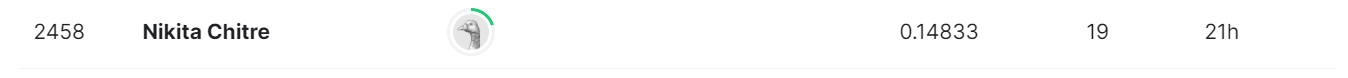

Link: https://www.kaggle.com/nikitachitre/competitions

# Conclusion

1.   The house price is dependent upon parameters such as Overall quality, total basement area, garage area and total rooms above basement.
2.   A house having better overall quality has higher sale price.
3. Also, larger total basement area, garage area indicates higher sale price.
4. Furthermore, total rooms of a house greatly influence the sale price - more rooms indicate higher price.
5. Performing data preprocessing resulting higher accuracy than baseline model.







